In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

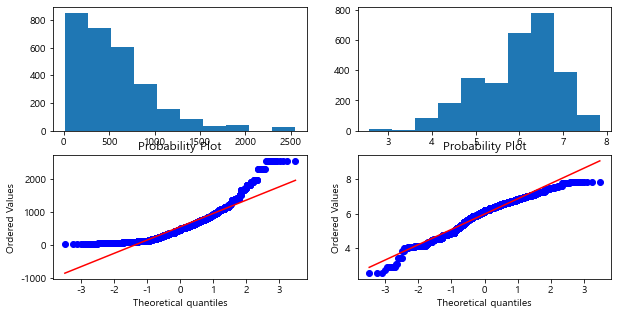

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

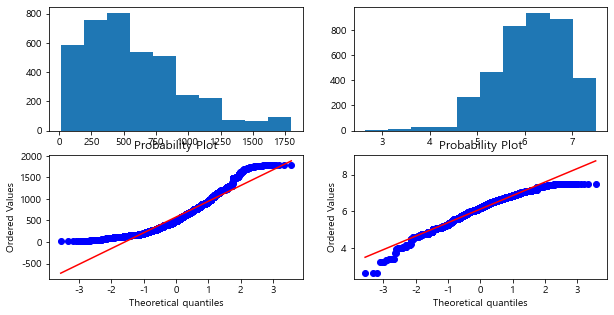

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

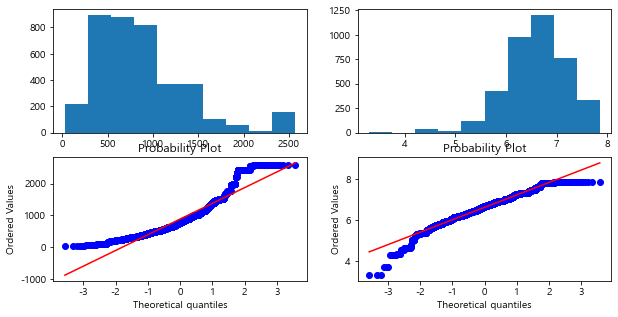

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

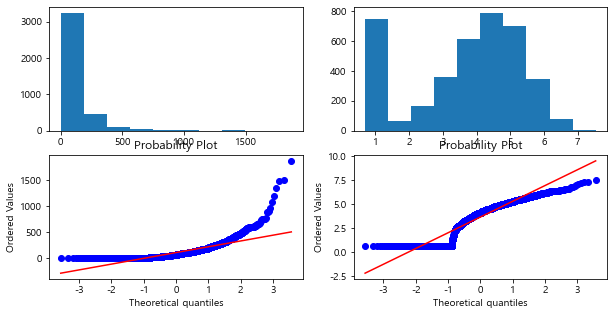

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

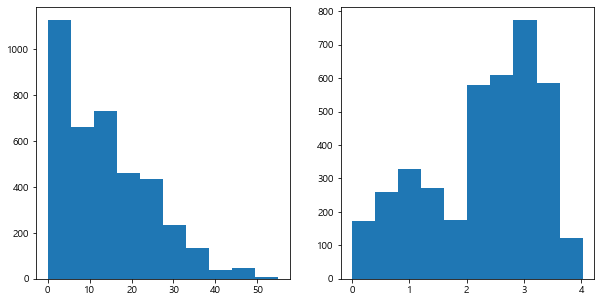

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

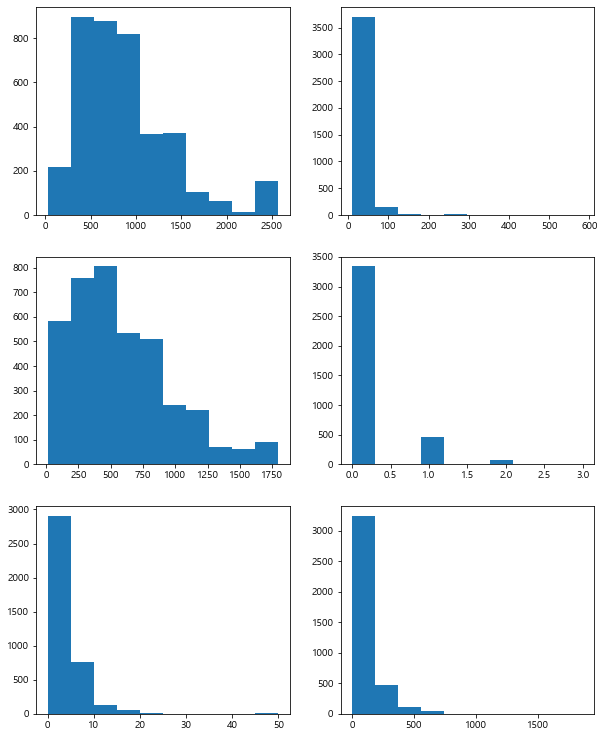

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

# 서울은 test에 없으니깐 제외하고 보자!

In [67]:
train = train.loc[~(train['지역'] =='서울특별시'),:]

In [68]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [70]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=5000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6815171	total: 159ms	remaining: 13m 13s
1:	learn: 0.6551644	total: 170ms	remaining: 7m 4s
2:	learn: 0.6305825	total: 181ms	remaining: 5m
3:	learn: 0.6081818	total: 191ms	remaining: 3m 58s
4:	learn: 0.5892849	total: 202ms	remaining: 3m 21s
5:	learn: 0.5677000	total: 212ms	remaining: 2m 56s
6:	learn: 0.5477474	total: 223ms	remaining: 2m 38s
7:	learn: 0.5289311	total: 233ms	remaining: 2m 25s
8:	learn: 0.5129987	total: 243ms	remaining: 2m 14s
9:	learn: 0.4963140	total: 255ms	remaining: 2m 7s
10:	learn: 0.4778999	total: 266ms	remaining: 2m
11:	learn: 0.4612371	total: 277ms	remaining: 1m 55s
12:	learn: 0.4473351	total: 287ms	remaining: 1m 49s
13:	learn: 0.4342178	total: 297ms	remaining: 1m 45s
14:	learn: 0.4206876	total: 307ms	remaining: 1m 42s
15:	learn: 0.4072603	total: 318ms	remaining: 1m 38s
16:	learn: 0.3973905	total: 327ms	remaining: 1m 35s
17:	learn: 0.3856280	total: 338ms	remaining: 1m 33s
18:	learn: 0.3781687	total: 348ms	remaining: 1m 31s
19:	learn: 0.3691542	total: 358

171:	learn: 0.1257951	total: 1.99s	remaining: 56s
172:	learn: 0.1256481	total: 2.01s	remaining: 56s
173:	learn: 0.1254918	total: 2.02s	remaining: 55.9s
174:	learn: 0.1252939	total: 2.03s	remaining: 55.9s
175:	learn: 0.1251159	total: 2.04s	remaining: 55.8s
176:	learn: 0.1250210	total: 2.05s	remaining: 55.8s
177:	learn: 0.1247289	total: 2.06s	remaining: 55.8s
178:	learn: 0.1246059	total: 2.07s	remaining: 55.7s
179:	learn: 0.1241128	total: 2.08s	remaining: 55.7s
180:	learn: 0.1238861	total: 2.09s	remaining: 55.7s
181:	learn: 0.1235479	total: 2.1s	remaining: 55.6s
182:	learn: 0.1230797	total: 2.11s	remaining: 55.6s
183:	learn: 0.1226924	total: 2.12s	remaining: 55.5s
184:	learn: 0.1222140	total: 2.13s	remaining: 55.5s
185:	learn: 0.1221167	total: 2.14s	remaining: 55.5s
186:	learn: 0.1215681	total: 2.15s	remaining: 55.4s
187:	learn: 0.1214902	total: 2.16s	remaining: 55.4s
188:	learn: 0.1210861	total: 2.17s	remaining: 55.4s
189:	learn: 0.1208006	total: 2.19s	remaining: 55.3s
190:	learn: 0.120

344:	learn: 0.0907622	total: 3.81s	remaining: 51.4s
345:	learn: 0.0907106	total: 3.82s	remaining: 51.3s
346:	learn: 0.0905152	total: 3.83s	remaining: 51.3s
347:	learn: 0.0904537	total: 3.83s	remaining: 51.3s
348:	learn: 0.0903123	total: 3.85s	remaining: 51.2s
349:	learn: 0.0899151	total: 3.85s	remaining: 51.2s
350:	learn: 0.0898302	total: 3.86s	remaining: 51.2s
351:	learn: 0.0896248	total: 3.87s	remaining: 51.2s
352:	learn: 0.0895746	total: 3.88s	remaining: 51.1s
353:	learn: 0.0894795	total: 3.89s	remaining: 51.1s
354:	learn: 0.0894674	total: 3.9s	remaining: 51.1s
355:	learn: 0.0893987	total: 3.91s	remaining: 51.1s
356:	learn: 0.0893309	total: 3.92s	remaining: 51s
357:	learn: 0.0892550	total: 3.93s	remaining: 51s
358:	learn: 0.0890735	total: 3.94s	remaining: 51s
359:	learn: 0.0889334	total: 3.95s	remaining: 51s
360:	learn: 0.0888777	total: 3.96s	remaining: 51s
361:	learn: 0.0887701	total: 3.98s	remaining: 50.9s
362:	learn: 0.0887238	total: 3.99s	remaining: 50.9s
363:	learn: 0.0885882	t

517:	learn: 0.0730491	total: 5.63s	remaining: 48.8s
518:	learn: 0.0729785	total: 5.64s	remaining: 48.7s
519:	learn: 0.0729005	total: 5.66s	remaining: 48.7s
520:	learn: 0.0728177	total: 5.67s	remaining: 48.7s
521:	learn: 0.0727100	total: 5.68s	remaining: 48.7s
522:	learn: 0.0726929	total: 5.69s	remaining: 48.7s
523:	learn: 0.0725433	total: 5.7s	remaining: 48.7s
524:	learn: 0.0725313	total: 5.71s	remaining: 48.7s
525:	learn: 0.0724517	total: 5.72s	remaining: 48.7s
526:	learn: 0.0723028	total: 5.73s	remaining: 48.6s
527:	learn: 0.0722854	total: 5.74s	remaining: 48.6s
528:	learn: 0.0722176	total: 5.75s	remaining: 48.6s
529:	learn: 0.0718232	total: 5.76s	remaining: 48.6s
530:	learn: 0.0717264	total: 5.78s	remaining: 48.6s
531:	learn: 0.0716902	total: 5.79s	remaining: 48.6s
532:	learn: 0.0715999	total: 5.8s	remaining: 48.6s
533:	learn: 0.0715563	total: 5.81s	remaining: 48.6s
534:	learn: 0.0714413	total: 5.82s	remaining: 48.6s
535:	learn: 0.0714067	total: 5.83s	remaining: 48.6s
536:	learn: 0.

688:	learn: 0.0647367	total: 7.45s	remaining: 46.6s
689:	learn: 0.0647330	total: 7.45s	remaining: 46.6s
690:	learn: 0.0647114	total: 7.46s	remaining: 46.6s
691:	learn: 0.0646412	total: 7.47s	remaining: 46.5s
692:	learn: 0.0646215	total: 7.49s	remaining: 46.5s
693:	learn: 0.0646159	total: 7.5s	remaining: 46.5s
694:	learn: 0.0646056	total: 7.51s	remaining: 46.5s
695:	learn: 0.0644718	total: 7.52s	remaining: 46.5s
696:	learn: 0.0644374	total: 7.53s	remaining: 46.5s
697:	learn: 0.0644313	total: 7.54s	remaining: 46.5s
698:	learn: 0.0643721	total: 7.55s	remaining: 46.5s
699:	learn: 0.0643629	total: 7.56s	remaining: 46.4s
700:	learn: 0.0642445	total: 7.57s	remaining: 46.4s
701:	learn: 0.0642411	total: 7.58s	remaining: 46.4s
702:	learn: 0.0641504	total: 7.59s	remaining: 46.4s
703:	learn: 0.0641314	total: 7.6s	remaining: 46.4s
704:	learn: 0.0640576	total: 7.61s	remaining: 46.4s
705:	learn: 0.0640356	total: 7.62s	remaining: 46.4s
706:	learn: 0.0639938	total: 7.63s	remaining: 46.3s
707:	learn: 0.

861:	learn: 0.0579310	total: 9.27s	remaining: 44.5s
862:	learn: 0.0579072	total: 9.28s	remaining: 44.5s
863:	learn: 0.0578997	total: 9.29s	remaining: 44.5s
864:	learn: 0.0578602	total: 9.3s	remaining: 44.5s
865:	learn: 0.0578419	total: 9.31s	remaining: 44.5s
866:	learn: 0.0578109	total: 9.32s	remaining: 44.4s
867:	learn: 0.0577629	total: 9.33s	remaining: 44.4s
868:	learn: 0.0576248	total: 9.34s	remaining: 44.4s
869:	learn: 0.0575458	total: 9.35s	remaining: 44.4s
870:	learn: 0.0575355	total: 9.37s	remaining: 44.4s
871:	learn: 0.0575227	total: 9.38s	remaining: 44.4s
872:	learn: 0.0574793	total: 9.38s	remaining: 44.4s
873:	learn: 0.0574668	total: 9.4s	remaining: 44.4s
874:	learn: 0.0574071	total: 9.41s	remaining: 44.4s
875:	learn: 0.0574011	total: 9.42s	remaining: 44.3s
876:	learn: 0.0573982	total: 9.43s	remaining: 44.3s
877:	learn: 0.0573893	total: 9.44s	remaining: 44.3s
878:	learn: 0.0573828	total: 9.45s	remaining: 44.3s
879:	learn: 0.0573782	total: 9.46s	remaining: 44.3s
880:	learn: 0.

1031:	learn: 0.0524978	total: 11.1s	remaining: 42.6s
1032:	learn: 0.0524866	total: 11.1s	remaining: 42.6s
1033:	learn: 0.0524845	total: 11.1s	remaining: 42.6s
1034:	learn: 0.0524797	total: 11.1s	remaining: 42.6s
1035:	learn: 0.0524117	total: 11.1s	remaining: 42.5s
1036:	learn: 0.0523394	total: 11.1s	remaining: 42.5s
1037:	learn: 0.0523071	total: 11.1s	remaining: 42.5s
1038:	learn: 0.0522535	total: 11.1s	remaining: 42.5s
1039:	learn: 0.0522474	total: 11.2s	remaining: 42.5s
1040:	learn: 0.0521786	total: 11.2s	remaining: 42.5s
1041:	learn: 0.0521772	total: 11.2s	remaining: 42.5s
1042:	learn: 0.0520791	total: 11.2s	remaining: 42.5s
1043:	learn: 0.0520579	total: 11.2s	remaining: 42.4s
1044:	learn: 0.0520139	total: 11.2s	remaining: 42.4s
1045:	learn: 0.0519951	total: 11.2s	remaining: 42.4s
1046:	learn: 0.0519863	total: 11.2s	remaining: 42.4s
1047:	learn: 0.0519633	total: 11.3s	remaining: 42.4s
1048:	learn: 0.0519511	total: 11.3s	remaining: 42.4s
1049:	learn: 0.0519493	total: 11.3s	remaining:

1189:	learn: 0.0483724	total: 12.9s	remaining: 41.2s
1190:	learn: 0.0483455	total: 12.9s	remaining: 41.2s
1191:	learn: 0.0483440	total: 12.9s	remaining: 41.2s
1192:	learn: 0.0483403	total: 12.9s	remaining: 41.2s
1193:	learn: 0.0483349	total: 12.9s	remaining: 41.2s
1194:	learn: 0.0481968	total: 12.9s	remaining: 41.2s
1195:	learn: 0.0481747	total: 12.9s	remaining: 41.2s
1196:	learn: 0.0480851	total: 13s	remaining: 41.2s
1197:	learn: 0.0480799	total: 13s	remaining: 41.2s
1198:	learn: 0.0480514	total: 13s	remaining: 41.2s
1199:	learn: 0.0480509	total: 13s	remaining: 41.2s
1200:	learn: 0.0480501	total: 13s	remaining: 41.2s
1201:	learn: 0.0480480	total: 13s	remaining: 41.2s
1202:	learn: 0.0480421	total: 13s	remaining: 41.2s
1203:	learn: 0.0480406	total: 13.1s	remaining: 41.2s
1204:	learn: 0.0480220	total: 13.1s	remaining: 41.1s
1205:	learn: 0.0479894	total: 13.1s	remaining: 41.1s
1206:	learn: 0.0479829	total: 13.1s	remaining: 41.1s
1207:	learn: 0.0479807	total: 13.1s	remaining: 41.1s
1208:	l

1352:	learn: 0.0448998	total: 14.7s	remaining: 39.6s
1353:	learn: 0.0448897	total: 14.7s	remaining: 39.6s
1354:	learn: 0.0448833	total: 14.7s	remaining: 39.6s
1355:	learn: 0.0448687	total: 14.7s	remaining: 39.5s
1356:	learn: 0.0448641	total: 14.7s	remaining: 39.5s
1357:	learn: 0.0447818	total: 14.7s	remaining: 39.5s
1358:	learn: 0.0447722	total: 14.7s	remaining: 39.5s
1359:	learn: 0.0446886	total: 14.8s	remaining: 39.5s
1360:	learn: 0.0446877	total: 14.8s	remaining: 39.5s
1361:	learn: 0.0446529	total: 14.8s	remaining: 39.5s
1362:	learn: 0.0446470	total: 14.8s	remaining: 39.5s
1363:	learn: 0.0446391	total: 14.8s	remaining: 39.5s
1364:	learn: 0.0446251	total: 14.8s	remaining: 39.4s
1365:	learn: 0.0446166	total: 14.8s	remaining: 39.4s
1366:	learn: 0.0445898	total: 14.8s	remaining: 39.4s
1367:	learn: 0.0445866	total: 14.8s	remaining: 39.4s
1368:	learn: 0.0445678	total: 14.9s	remaining: 39.4s
1369:	learn: 0.0445465	total: 14.9s	remaining: 39.4s
1370:	learn: 0.0445191	total: 14.9s	remaining:

1511:	learn: 0.0412101	total: 16.3s	remaining: 37.7s
1512:	learn: 0.0412021	total: 16.3s	remaining: 37.7s
1513:	learn: 0.0411972	total: 16.4s	remaining: 37.7s
1514:	learn: 0.0411639	total: 16.4s	remaining: 37.7s
1515:	learn: 0.0411514	total: 16.4s	remaining: 37.6s
1516:	learn: 0.0411505	total: 16.4s	remaining: 37.6s
1517:	learn: 0.0411476	total: 16.4s	remaining: 37.6s
1518:	learn: 0.0411339	total: 16.4s	remaining: 37.6s
1519:	learn: 0.0411291	total: 16.4s	remaining: 37.6s
1520:	learn: 0.0411008	total: 16.4s	remaining: 37.6s
1521:	learn: 0.0410985	total: 16.4s	remaining: 37.6s
1522:	learn: 0.0410730	total: 16.5s	remaining: 37.6s
1523:	learn: 0.0410501	total: 16.5s	remaining: 37.5s
1524:	learn: 0.0410112	total: 16.5s	remaining: 37.5s
1525:	learn: 0.0410069	total: 16.5s	remaining: 37.5s
1526:	learn: 0.0409918	total: 16.5s	remaining: 37.5s
1527:	learn: 0.0409737	total: 16.5s	remaining: 37.5s
1528:	learn: 0.0409578	total: 16.5s	remaining: 37.5s
1529:	learn: 0.0409533	total: 16.5s	remaining:

1668:	learn: 0.0387703	total: 18s	remaining: 35.9s
1669:	learn: 0.0387463	total: 18s	remaining: 35.9s
1670:	learn: 0.0387293	total: 18s	remaining: 35.9s
1671:	learn: 0.0387035	total: 18s	remaining: 35.8s
1672:	learn: 0.0386999	total: 18s	remaining: 35.8s
1673:	learn: 0.0386971	total: 18s	remaining: 35.8s
1674:	learn: 0.0386497	total: 18s	remaining: 35.8s
1675:	learn: 0.0386465	total: 18s	remaining: 35.8s
1676:	learn: 0.0386351	total: 18.1s	remaining: 35.8s
1677:	learn: 0.0386342	total: 18.1s	remaining: 35.8s
1678:	learn: 0.0386200	total: 18.1s	remaining: 35.8s
1679:	learn: 0.0385937	total: 18.1s	remaining: 35.7s
1680:	learn: 0.0385914	total: 18.1s	remaining: 35.7s
1681:	learn: 0.0385898	total: 18.1s	remaining: 35.7s
1682:	learn: 0.0385706	total: 18.1s	remaining: 35.7s
1683:	learn: 0.0385684	total: 18.1s	remaining: 35.7s
1684:	learn: 0.0385635	total: 18.1s	remaining: 35.7s
1685:	learn: 0.0385601	total: 18.1s	remaining: 35.7s
1686:	learn: 0.0385500	total: 18.2s	remaining: 35.7s
1687:	lea

1829:	learn: 0.0370924	total: 19.8s	remaining: 34.3s
1830:	learn: 0.0370916	total: 19.8s	remaining: 34.3s
1831:	learn: 0.0370854	total: 19.8s	remaining: 34.3s
1832:	learn: 0.0370520	total: 19.8s	remaining: 34.3s
1833:	learn: 0.0370405	total: 19.8s	remaining: 34.2s
1834:	learn: 0.0370389	total: 19.8s	remaining: 34.2s
1835:	learn: 0.0370362	total: 19.9s	remaining: 34.2s
1836:	learn: 0.0370357	total: 19.9s	remaining: 34.2s
1837:	learn: 0.0370327	total: 19.9s	remaining: 34.2s
1838:	learn: 0.0370296	total: 19.9s	remaining: 34.2s
1839:	learn: 0.0370256	total: 19.9s	remaining: 34.2s
1840:	learn: 0.0370235	total: 19.9s	remaining: 34.2s
1841:	learn: 0.0370198	total: 19.9s	remaining: 34.2s
1842:	learn: 0.0370171	total: 19.9s	remaining: 34.1s
1843:	learn: 0.0370161	total: 19.9s	remaining: 34.1s
1844:	learn: 0.0370108	total: 20s	remaining: 34.1s
1845:	learn: 0.0370079	total: 20s	remaining: 34.1s
1846:	learn: 0.0370055	total: 20s	remaining: 34.1s
1847:	learn: 0.0370042	total: 20s	remaining: 34.1s
1

1986:	learn: 0.0357392	total: 21.5s	remaining: 32.5s
1987:	learn: 0.0357380	total: 21.5s	remaining: 32.5s
1988:	learn: 0.0357362	total: 21.5s	remaining: 32.5s
1989:	learn: 0.0357358	total: 21.5s	remaining: 32.5s
1990:	learn: 0.0357341	total: 21.5s	remaining: 32.5s
1991:	learn: 0.0357291	total: 21.5s	remaining: 32.5s
1992:	learn: 0.0357078	total: 21.5s	remaining: 32.5s
1993:	learn: 0.0357000	total: 21.5s	remaining: 32.4s
1994:	learn: 0.0356909	total: 21.5s	remaining: 32.4s
1995:	learn: 0.0356288	total: 21.5s	remaining: 32.4s
1996:	learn: 0.0356153	total: 21.6s	remaining: 32.4s
1997:	learn: 0.0356023	total: 21.6s	remaining: 32.4s
1998:	learn: 0.0355906	total: 21.6s	remaining: 32.4s
1999:	learn: 0.0355817	total: 21.6s	remaining: 32.4s
2000:	learn: 0.0355661	total: 21.6s	remaining: 32.4s
2001:	learn: 0.0355632	total: 21.6s	remaining: 32.4s
2002:	learn: 0.0355595	total: 21.6s	remaining: 32.3s
2003:	learn: 0.0355583	total: 21.6s	remaining: 32.3s
2004:	learn: 0.0355318	total: 21.6s	remaining:

2142:	learn: 0.0337197	total: 23.1s	remaining: 30.8s
2143:	learn: 0.0337177	total: 23.1s	remaining: 30.8s
2144:	learn: 0.0337046	total: 23.1s	remaining: 30.8s
2145:	learn: 0.0336460	total: 23.1s	remaining: 30.8s
2146:	learn: 0.0336404	total: 23.1s	remaining: 30.8s
2147:	learn: 0.0336351	total: 23.2s	remaining: 30.7s
2148:	learn: 0.0336279	total: 23.2s	remaining: 30.7s
2149:	learn: 0.0336174	total: 23.2s	remaining: 30.7s
2150:	learn: 0.0336104	total: 23.2s	remaining: 30.7s
2151:	learn: 0.0336085	total: 23.2s	remaining: 30.7s
2152:	learn: 0.0336057	total: 23.2s	remaining: 30.7s
2153:	learn: 0.0336033	total: 23.2s	remaining: 30.7s
2154:	learn: 0.0336022	total: 23.2s	remaining: 30.7s
2155:	learn: 0.0336016	total: 23.2s	remaining: 30.7s
2156:	learn: 0.0335995	total: 23.2s	remaining: 30.6s
2157:	learn: 0.0335987	total: 23.3s	remaining: 30.6s
2158:	learn: 0.0335985	total: 23.3s	remaining: 30.6s
2159:	learn: 0.0335956	total: 23.3s	remaining: 30.6s
2160:	learn: 0.0335699	total: 23.3s	remaining:

2300:	learn: 0.0324805	total: 24.7s	remaining: 29s
2301:	learn: 0.0324800	total: 24.8s	remaining: 29s
2302:	learn: 0.0324799	total: 24.8s	remaining: 29s
2303:	learn: 0.0324795	total: 24.8s	remaining: 29s
2304:	learn: 0.0324739	total: 24.8s	remaining: 29s
2305:	learn: 0.0324694	total: 24.8s	remaining: 29s
2306:	learn: 0.0324587	total: 24.8s	remaining: 29s
2307:	learn: 0.0324535	total: 24.8s	remaining: 28.9s
2308:	learn: 0.0324534	total: 24.8s	remaining: 28.9s
2309:	learn: 0.0324482	total: 24.8s	remaining: 28.9s
2310:	learn: 0.0324477	total: 24.9s	remaining: 28.9s
2311:	learn: 0.0324432	total: 24.9s	remaining: 28.9s
2312:	learn: 0.0324401	total: 24.9s	remaining: 28.9s
2313:	learn: 0.0324395	total: 24.9s	remaining: 28.9s
2314:	learn: 0.0324312	total: 24.9s	remaining: 28.9s
2315:	learn: 0.0324275	total: 24.9s	remaining: 28.9s
2316:	learn: 0.0324206	total: 24.9s	remaining: 28.8s
2317:	learn: 0.0324191	total: 24.9s	remaining: 28.8s
2318:	learn: 0.0324000	total: 24.9s	remaining: 28.8s
2319:	l

2457:	learn: 0.0316966	total: 26.4s	remaining: 27.3s
2458:	learn: 0.0316958	total: 26.4s	remaining: 27.3s
2459:	learn: 0.0316902	total: 26.4s	remaining: 27.3s
2460:	learn: 0.0316901	total: 26.4s	remaining: 27.3s
2461:	learn: 0.0316898	total: 26.4s	remaining: 27.3s
2462:	learn: 0.0316896	total: 26.5s	remaining: 27.2s
2463:	learn: 0.0316896	total: 26.5s	remaining: 27.2s
2464:	learn: 0.0316891	total: 26.5s	remaining: 27.2s
2465:	learn: 0.0316883	total: 26.5s	remaining: 27.2s
2466:	learn: 0.0316846	total: 26.5s	remaining: 27.2s
2467:	learn: 0.0316823	total: 26.5s	remaining: 27.2s
2468:	learn: 0.0316798	total: 26.5s	remaining: 27.2s
2469:	learn: 0.0316794	total: 26.5s	remaining: 27.2s
2470:	learn: 0.0316720	total: 26.5s	remaining: 27.2s
2471:	learn: 0.0316713	total: 26.5s	remaining: 27.1s
2472:	learn: 0.0316661	total: 26.6s	remaining: 27.1s
2473:	learn: 0.0316642	total: 26.6s	remaining: 27.1s
2474:	learn: 0.0316611	total: 26.6s	remaining: 27.1s
2475:	learn: 0.0316606	total: 26.6s	remaining:

2616:	learn: 0.0308905	total: 28.1s	remaining: 25.5s
2617:	learn: 0.0308901	total: 28.1s	remaining: 25.5s
2618:	learn: 0.0308879	total: 28.1s	remaining: 25.5s
2619:	learn: 0.0308815	total: 28.1s	remaining: 25.5s
2620:	learn: 0.0308813	total: 28.1s	remaining: 25.5s
2621:	learn: 0.0308810	total: 28.1s	remaining: 25.5s
2622:	learn: 0.0308795	total: 28.1s	remaining: 25.5s
2623:	learn: 0.0308792	total: 28.1s	remaining: 25.5s
2624:	learn: 0.0308768	total: 28.1s	remaining: 25.5s
2625:	learn: 0.0308617	total: 28.1s	remaining: 25.4s
2626:	learn: 0.0308393	total: 28.2s	remaining: 25.4s
2627:	learn: 0.0308385	total: 28.2s	remaining: 25.4s
2628:	learn: 0.0308236	total: 28.2s	remaining: 25.4s
2629:	learn: 0.0308227	total: 28.2s	remaining: 25.4s
2630:	learn: 0.0308187	total: 28.2s	remaining: 25.4s
2631:	learn: 0.0308088	total: 28.2s	remaining: 25.4s
2632:	learn: 0.0307848	total: 28.2s	remaining: 25.4s
2633:	learn: 0.0307810	total: 28.2s	remaining: 25.4s
2634:	learn: 0.0307779	total: 28.2s	remaining:

2781:	learn: 0.0296981	total: 29.9s	remaining: 23.8s
2782:	learn: 0.0296968	total: 29.9s	remaining: 23.8s
2783:	learn: 0.0296864	total: 29.9s	remaining: 23.8s
2784:	learn: 0.0296854	total: 29.9s	remaining: 23.8s
2785:	learn: 0.0296674	total: 29.9s	remaining: 23.8s
2786:	learn: 0.0296624	total: 29.9s	remaining: 23.8s
2787:	learn: 0.0296371	total: 30s	remaining: 23.8s
2788:	learn: 0.0296317	total: 30s	remaining: 23.8s
2789:	learn: 0.0296271	total: 30s	remaining: 23.7s
2790:	learn: 0.0296244	total: 30s	remaining: 23.7s
2791:	learn: 0.0295980	total: 30s	remaining: 23.7s
2792:	learn: 0.0295956	total: 30s	remaining: 23.7s
2793:	learn: 0.0295935	total: 30s	remaining: 23.7s
2794:	learn: 0.0295910	total: 30s	remaining: 23.7s
2795:	learn: 0.0295899	total: 30s	remaining: 23.7s
2796:	learn: 0.0295595	total: 30.1s	remaining: 23.7s
2797:	learn: 0.0295515	total: 30.1s	remaining: 23.7s
2798:	learn: 0.0295509	total: 30.1s	remaining: 23.6s
2799:	learn: 0.0295492	total: 30.1s	remaining: 23.6s
2800:	learn

2946:	learn: 0.0288117	total: 31.7s	remaining: 22.1s
2947:	learn: 0.0288100	total: 31.7s	remaining: 22.1s
2948:	learn: 0.0288054	total: 31.7s	remaining: 22s
2949:	learn: 0.0288047	total: 31.7s	remaining: 22s
2950:	learn: 0.0287607	total: 31.7s	remaining: 22s
2951:	learn: 0.0287591	total: 31.7s	remaining: 22s
2952:	learn: 0.0287587	total: 31.7s	remaining: 22s
2953:	learn: 0.0287518	total: 31.7s	remaining: 22s
2954:	learn: 0.0287509	total: 31.8s	remaining: 22s
2955:	learn: 0.0287499	total: 31.8s	remaining: 22s
2956:	learn: 0.0287494	total: 31.8s	remaining: 22s
2957:	learn: 0.0287468	total: 31.8s	remaining: 21.9s
2958:	learn: 0.0286700	total: 31.8s	remaining: 21.9s
2959:	learn: 0.0286668	total: 31.8s	remaining: 21.9s
2960:	learn: 0.0286596	total: 31.8s	remaining: 21.9s
2961:	learn: 0.0286556	total: 31.8s	remaining: 21.9s
2962:	learn: 0.0286154	total: 31.8s	remaining: 21.9s
2963:	learn: 0.0286149	total: 31.8s	remaining: 21.9s
2964:	learn: 0.0286130	total: 31.9s	remaining: 21.9s
2965:	learn

3114:	learn: 0.0279993	total: 33.5s	remaining: 20.3s
3115:	learn: 0.0279936	total: 33.5s	remaining: 20.3s
3116:	learn: 0.0279870	total: 33.5s	remaining: 20.2s
3117:	learn: 0.0279728	total: 33.5s	remaining: 20.2s
3118:	learn: 0.0279689	total: 33.5s	remaining: 20.2s
3119:	learn: 0.0279637	total: 33.5s	remaining: 20.2s
3120:	learn: 0.0279601	total: 33.5s	remaining: 20.2s
3121:	learn: 0.0279496	total: 33.6s	remaining: 20.2s
3122:	learn: 0.0279488	total: 33.6s	remaining: 20.2s
3123:	learn: 0.0279413	total: 33.6s	remaining: 20.2s
3124:	learn: 0.0279403	total: 33.6s	remaining: 20.2s
3125:	learn: 0.0279373	total: 33.6s	remaining: 20.1s
3126:	learn: 0.0279358	total: 33.6s	remaining: 20.1s
3127:	learn: 0.0279353	total: 33.6s	remaining: 20.1s
3128:	learn: 0.0279256	total: 33.6s	remaining: 20.1s
3129:	learn: 0.0279228	total: 33.6s	remaining: 20.1s
3130:	learn: 0.0279173	total: 33.6s	remaining: 20.1s
3131:	learn: 0.0279156	total: 33.7s	remaining: 20.1s
3132:	learn: 0.0279149	total: 33.7s	remaining:

3283:	learn: 0.0271753	total: 35.3s	remaining: 18.4s
3284:	learn: 0.0271752	total: 35.3s	remaining: 18.4s
3285:	learn: 0.0271719	total: 35.3s	remaining: 18.4s
3286:	learn: 0.0271714	total: 35.3s	remaining: 18.4s
3287:	learn: 0.0271691	total: 35.3s	remaining: 18.4s
3288:	learn: 0.0271680	total: 35.3s	remaining: 18.4s
3289:	learn: 0.0271665	total: 35.3s	remaining: 18.4s
3290:	learn: 0.0271659	total: 35.4s	remaining: 18.4s
3291:	learn: 0.0271655	total: 35.4s	remaining: 18.3s
3292:	learn: 0.0271642	total: 35.4s	remaining: 18.3s
3293:	learn: 0.0271623	total: 35.4s	remaining: 18.3s
3294:	learn: 0.0271563	total: 35.4s	remaining: 18.3s
3295:	learn: 0.0271547	total: 35.4s	remaining: 18.3s
3296:	learn: 0.0271543	total: 35.4s	remaining: 18.3s
3297:	learn: 0.0271510	total: 35.4s	remaining: 18.3s
3298:	learn: 0.0271495	total: 35.4s	remaining: 18.3s
3299:	learn: 0.0271455	total: 35.5s	remaining: 18.3s
3300:	learn: 0.0271446	total: 35.5s	remaining: 18.3s
3301:	learn: 0.0271444	total: 35.5s	remaining:

3448:	learn: 0.0264521	total: 37.1s	remaining: 16.7s
3449:	learn: 0.0264513	total: 37.1s	remaining: 16.7s
3450:	learn: 0.0264499	total: 37.1s	remaining: 16.7s
3451:	learn: 0.0264496	total: 37.1s	remaining: 16.6s
3452:	learn: 0.0264472	total: 37.1s	remaining: 16.6s
3453:	learn: 0.0264459	total: 37.1s	remaining: 16.6s
3454:	learn: 0.0264403	total: 37.1s	remaining: 16.6s
3455:	learn: 0.0264383	total: 37.2s	remaining: 16.6s
3456:	learn: 0.0264369	total: 37.2s	remaining: 16.6s
3457:	learn: 0.0263811	total: 37.2s	remaining: 16.6s
3458:	learn: 0.0263807	total: 37.2s	remaining: 16.6s
3459:	learn: 0.0263804	total: 37.2s	remaining: 16.6s
3460:	learn: 0.0263751	total: 37.2s	remaining: 16.5s
3461:	learn: 0.0263706	total: 37.2s	remaining: 16.5s
3462:	learn: 0.0263698	total: 37.2s	remaining: 16.5s
3463:	learn: 0.0263494	total: 37.2s	remaining: 16.5s
3464:	learn: 0.0263442	total: 37.3s	remaining: 16.5s
3465:	learn: 0.0263441	total: 37.3s	remaining: 16.5s
3466:	learn: 0.0263439	total: 37.3s	remaining:

3618:	learn: 0.0258113	total: 38.9s	remaining: 14.8s
3619:	learn: 0.0258092	total: 38.9s	remaining: 14.8s
3620:	learn: 0.0258089	total: 38.9s	remaining: 14.8s
3621:	learn: 0.0258061	total: 38.9s	remaining: 14.8s
3622:	learn: 0.0258014	total: 38.9s	remaining: 14.8s
3623:	learn: 0.0257951	total: 38.9s	remaining: 14.8s
3624:	learn: 0.0257950	total: 39s	remaining: 14.8s
3625:	learn: 0.0257948	total: 39s	remaining: 14.8s
3626:	learn: 0.0257944	total: 39s	remaining: 14.8s
3627:	learn: 0.0257922	total: 39s	remaining: 14.7s
3628:	learn: 0.0257909	total: 39s	remaining: 14.7s
3629:	learn: 0.0257703	total: 39s	remaining: 14.7s
3630:	learn: 0.0257702	total: 39s	remaining: 14.7s
3631:	learn: 0.0257701	total: 39s	remaining: 14.7s
3632:	learn: 0.0257536	total: 39s	remaining: 14.7s
3633:	learn: 0.0257528	total: 39.1s	remaining: 14.7s
3634:	learn: 0.0257524	total: 39.1s	remaining: 14.7s
3635:	learn: 0.0257498	total: 39.1s	remaining: 14.7s
3636:	learn: 0.0257495	total: 39.1s	remaining: 14.6s
3637:	learn

3785:	learn: 0.0252211	total: 40.7s	remaining: 13.1s
3786:	learn: 0.0252194	total: 40.7s	remaining: 13s
3787:	learn: 0.0252164	total: 40.7s	remaining: 13s
3788:	learn: 0.0252163	total: 40.7s	remaining: 13s
3789:	learn: 0.0252109	total: 40.7s	remaining: 13s
3790:	learn: 0.0252099	total: 40.8s	remaining: 13s
3791:	learn: 0.0252088	total: 40.8s	remaining: 13s
3792:	learn: 0.0252077	total: 40.8s	remaining: 13s
3793:	learn: 0.0252070	total: 40.8s	remaining: 13s
3794:	learn: 0.0252067	total: 40.8s	remaining: 13s
3795:	learn: 0.0252061	total: 40.8s	remaining: 12.9s
3796:	learn: 0.0252053	total: 40.8s	remaining: 12.9s
3797:	learn: 0.0252020	total: 40.8s	remaining: 12.9s
3798:	learn: 0.0252016	total: 40.8s	remaining: 12.9s
3799:	learn: 0.0252011	total: 40.8s	remaining: 12.9s
3800:	learn: 0.0252006	total: 40.9s	remaining: 12.9s
3801:	learn: 0.0251956	total: 40.9s	remaining: 12.9s
3802:	learn: 0.0251877	total: 40.9s	remaining: 12.9s
3803:	learn: 0.0251812	total: 40.9s	remaining: 12.9s
3804:	learn

3956:	learn: 0.0246018	total: 42.5s	remaining: 11.2s
3957:	learn: 0.0245973	total: 42.5s	remaining: 11.2s
3958:	learn: 0.0245970	total: 42.5s	remaining: 11.2s
3959:	learn: 0.0245957	total: 42.5s	remaining: 11.2s
3960:	learn: 0.0245951	total: 42.6s	remaining: 11.2s
3961:	learn: 0.0245951	total: 42.6s	remaining: 11.2s
3962:	learn: 0.0245951	total: 42.6s	remaining: 11.1s
3963:	learn: 0.0245949	total: 42.6s	remaining: 11.1s
3964:	learn: 0.0245910	total: 42.6s	remaining: 11.1s
3965:	learn: 0.0245901	total: 42.6s	remaining: 11.1s
3966:	learn: 0.0245813	total: 42.6s	remaining: 11.1s
3967:	learn: 0.0245773	total: 42.6s	remaining: 11.1s
3968:	learn: 0.0245773	total: 42.6s	remaining: 11.1s
3969:	learn: 0.0245729	total: 42.6s	remaining: 11.1s
3970:	learn: 0.0245720	total: 42.7s	remaining: 11.1s
3971:	learn: 0.0245719	total: 42.7s	remaining: 11s
3972:	learn: 0.0245709	total: 42.7s	remaining: 11s
3973:	learn: 0.0245671	total: 42.7s	remaining: 11s
3974:	learn: 0.0245661	total: 42.7s	remaining: 11s
3

4120:	learn: 0.0242856	total: 44.3s	remaining: 9.45s
4121:	learn: 0.0242850	total: 44.3s	remaining: 9.44s
4122:	learn: 0.0242844	total: 44.3s	remaining: 9.43s
4123:	learn: 0.0242825	total: 44.4s	remaining: 9.42s
4124:	learn: 0.0242824	total: 44.4s	remaining: 9.41s
4125:	learn: 0.0242789	total: 44.4s	remaining: 9.4s
4126:	learn: 0.0242750	total: 44.4s	remaining: 9.39s
4127:	learn: 0.0242743	total: 44.4s	remaining: 9.38s
4128:	learn: 0.0242423	total: 44.4s	remaining: 9.37s
4129:	learn: 0.0242367	total: 44.4s	remaining: 9.36s
4130:	learn: 0.0242099	total: 44.4s	remaining: 9.35s
4131:	learn: 0.0242069	total: 44.4s	remaining: 9.34s
4132:	learn: 0.0241970	total: 44.5s	remaining: 9.32s
4133:	learn: 0.0241969	total: 44.5s	remaining: 9.31s
4134:	learn: 0.0241944	total: 44.5s	remaining: 9.3s
4135:	learn: 0.0241938	total: 44.5s	remaining: 9.29s
4136:	learn: 0.0241914	total: 44.5s	remaining: 9.28s
4137:	learn: 0.0241866	total: 44.5s	remaining: 9.27s
4138:	learn: 0.0241833	total: 44.5s	remaining: 9

4287:	learn: 0.0238153	total: 46.3s	remaining: 7.69s
4288:	learn: 0.0238152	total: 46.3s	remaining: 7.68s
4289:	learn: 0.0238152	total: 46.3s	remaining: 7.67s
4290:	learn: 0.0238147	total: 46.3s	remaining: 7.66s
4291:	learn: 0.0238145	total: 46.4s	remaining: 7.65s
4292:	learn: 0.0238138	total: 46.4s	remaining: 7.64s
4293:	learn: 0.0238130	total: 46.4s	remaining: 7.63s
4294:	learn: 0.0238123	total: 46.4s	remaining: 7.61s
4295:	learn: 0.0238106	total: 46.4s	remaining: 7.6s
4296:	learn: 0.0238105	total: 46.4s	remaining: 7.59s
4297:	learn: 0.0238093	total: 46.4s	remaining: 7.58s
4298:	learn: 0.0238087	total: 46.4s	remaining: 7.57s
4299:	learn: 0.0238080	total: 46.4s	remaining: 7.56s
4300:	learn: 0.0238074	total: 46.5s	remaining: 7.55s
4301:	learn: 0.0238070	total: 46.5s	remaining: 7.54s
4302:	learn: 0.0238067	total: 46.5s	remaining: 7.53s
4303:	learn: 0.0238064	total: 46.5s	remaining: 7.52s
4304:	learn: 0.0238063	total: 46.5s	remaining: 7.5s
4305:	learn: 0.0238011	total: 46.5s	remaining: 7

4448:	learn: 0.0232798	total: 48s	remaining: 5.94s
4449:	learn: 0.0232792	total: 48s	remaining: 5.93s
4450:	learn: 0.0232790	total: 48s	remaining: 5.92s
4451:	learn: 0.0232565	total: 48s	remaining: 5.91s
4452:	learn: 0.0232492	total: 48s	remaining: 5.9s
4453:	learn: 0.0232246	total: 48s	remaining: 5.89s
4454:	learn: 0.0232193	total: 48s	remaining: 5.88s
4455:	learn: 0.0232169	total: 48s	remaining: 5.87s
4456:	learn: 0.0232164	total: 48.1s	remaining: 5.85s
4457:	learn: 0.0232154	total: 48.1s	remaining: 5.84s
4458:	learn: 0.0232150	total: 48.1s	remaining: 5.83s
4459:	learn: 0.0232147	total: 48.1s	remaining: 5.82s
4460:	learn: 0.0232135	total: 48.1s	remaining: 5.81s
4461:	learn: 0.0232133	total: 48.1s	remaining: 5.8s
4462:	learn: 0.0232120	total: 48.1s	remaining: 5.79s
4463:	learn: 0.0231911	total: 48.1s	remaining: 5.78s
4464:	learn: 0.0231900	total: 48.1s	remaining: 5.77s
4465:	learn: 0.0231892	total: 48.1s	remaining: 5.76s
4466:	learn: 0.0231883	total: 48.2s	remaining: 5.75s
4467:	learn

4604:	learn: 0.0226926	total: 49.6s	remaining: 4.25s
4605:	learn: 0.0226902	total: 49.6s	remaining: 4.25s
4606:	learn: 0.0226874	total: 49.6s	remaining: 4.23s
4607:	learn: 0.0226854	total: 49.6s	remaining: 4.22s
4608:	learn: 0.0226850	total: 49.7s	remaining: 4.21s
4609:	learn: 0.0226850	total: 49.7s	remaining: 4.2s
4610:	learn: 0.0226823	total: 49.7s	remaining: 4.19s
4611:	learn: 0.0226811	total: 49.7s	remaining: 4.18s
4612:	learn: 0.0226783	total: 49.7s	remaining: 4.17s
4613:	learn: 0.0226755	total: 49.7s	remaining: 4.16s
4614:	learn: 0.0226721	total: 49.7s	remaining: 4.15s
4615:	learn: 0.0226702	total: 49.7s	remaining: 4.14s
4616:	learn: 0.0226678	total: 49.7s	remaining: 4.13s
4617:	learn: 0.0226674	total: 49.7s	remaining: 4.12s
4618:	learn: 0.0226671	total: 49.8s	remaining: 4.1s
4619:	learn: 0.0226670	total: 49.8s	remaining: 4.09s
4620:	learn: 0.0226658	total: 49.8s	remaining: 4.08s
4621:	learn: 0.0226655	total: 49.8s	remaining: 4.07s
4622:	learn: 0.0226619	total: 49.8s	remaining: 4

4763:	learn: 0.0222396	total: 51.3s	remaining: 2.54s
4764:	learn: 0.0222383	total: 51.3s	remaining: 2.53s
4765:	learn: 0.0222377	total: 51.3s	remaining: 2.52s
4766:	learn: 0.0222373	total: 51.3s	remaining: 2.51s
4767:	learn: 0.0222348	total: 51.3s	remaining: 2.5s
4768:	learn: 0.0222327	total: 51.3s	remaining: 2.48s
4769:	learn: 0.0222243	total: 51.3s	remaining: 2.47s
4770:	learn: 0.0222145	total: 51.3s	remaining: 2.46s
4771:	learn: 0.0222141	total: 51.3s	remaining: 2.45s
4772:	learn: 0.0222123	total: 51.3s	remaining: 2.44s
4773:	learn: 0.0222120	total: 51.4s	remaining: 2.43s
4774:	learn: 0.0222111	total: 51.4s	remaining: 2.42s
4775:	learn: 0.0222104	total: 51.4s	remaining: 2.41s
4776:	learn: 0.0222103	total: 51.4s	remaining: 2.4s
4777:	learn: 0.0222048	total: 51.4s	remaining: 2.39s
4778:	learn: 0.0222048	total: 51.4s	remaining: 2.38s
4779:	learn: 0.0222044	total: 51.4s	remaining: 2.37s
4780:	learn: 0.0222023	total: 51.4s	remaining: 2.35s
4781:	learn: 0.0222020	total: 51.4s	remaining: 2

4924:	learn: 0.0218588	total: 52.9s	remaining: 806ms
4925:	learn: 0.0218585	total: 52.9s	remaining: 795ms
4926:	learn: 0.0218584	total: 52.9s	remaining: 784ms
4927:	learn: 0.0218584	total: 52.9s	remaining: 774ms
4928:	learn: 0.0218583	total: 53s	remaining: 763ms
4929:	learn: 0.0218583	total: 53s	remaining: 752ms
4930:	learn: 0.0218579	total: 53s	remaining: 741ms
4931:	learn: 0.0218578	total: 53s	remaining: 731ms
4932:	learn: 0.0218568	total: 53s	remaining: 720ms
4933:	learn: 0.0218567	total: 53s	remaining: 709ms
4934:	learn: 0.0218566	total: 53s	remaining: 698ms
4935:	learn: 0.0218549	total: 53s	remaining: 688ms
4936:	learn: 0.0218547	total: 53s	remaining: 677ms
4937:	learn: 0.0218214	total: 53.1s	remaining: 666ms
4938:	learn: 0.0218210	total: 53.1s	remaining: 655ms
4939:	learn: 0.0218112	total: 53.1s	remaining: 645ms
4940:	learn: 0.0218103	total: 53.1s	remaining: 634ms
4941:	learn: 0.0218060	total: 53.1s	remaining: 623ms
4942:	learn: 0.0217991	total: 53.1s	remaining: 613ms
4943:	learn

# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type']
       
* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.561, 최적 alpha:{'n_estimators': 2000}      
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5789, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5614, 최적 alpha:{'n_estimators': 2000}
* 최종 혼합 모델의 MAE: 0.06148143788677414
* XGBM 모델의 MAE: 0.026202300105588303
* LGBM 모델의 MAE: 0.10375955751155994

# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', 'log_공가수']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.5689, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5781, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5701, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.05357396246440822
* XGBM 모델의 MAE: 0.025235652142157578
* LGBM 모델의 MAE: 0.08719012565977427

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 MAE 값: 0.3139, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.048265198465836344
* XGBM 모델의 MAE: 0.01935228778564425
* LGBM 모델의 MAE: 0.08074077359302155
* CATM 모델의 MAE: 0.05379142726570961

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0326218717153772
* XGBM 모델의 MAE: 0.01930947618185736
* LGBM 모델의 MAE: 0.04455987633255611
* CATM 모델의 MAE: 0.041844595139978576


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 나이테이블 제외해봤다~
* 최종 혼합 모델의 MAE: 0.038097369051566174
* XGBM 모델의 MAE: 0.023607419600352723
* LGBM 모델의 MAE: 0.049200211539695136
* CATM 모델의 MAE: 0.04903453231159108



# 서울 삭제 및 임대건물구분_lbl 컬럼 제외
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
* 최종 혼합 모델의 MAE: 0.0340476772506829
* XGBM 모델의 MAE: 0.018507504968209274
* LGBM 모델의 MAE: 0.044830610881126276
* CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
* 영향 없는듯...       
lable_name = 'log_등록차량수' 
최종 혼합 모델의 MAE: 0.0340476772506829
XGBM 모델의 MAE: 0.018507504968209274
LGBM 모델의 MAE: 0.044830610881126276
CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245 
* 실제 점수 : 94.04934


# 임대건물 구분 넣으니깐...
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03567008604962118
* XGBM 모델의 MAE: 0.014330334463868983
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

# log_단지내주차면수 로 변경
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0319842263933502
* XGBM 모델의 MAE: 0.014659369120077419
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245

# 임대건물구분_lbl, log_단지내주차면수 로 변경후
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.035655662244789756
* XGBM 모델의 MAE: 0.014303995685397359
* LGBM 모델의 MAE: 0.06334990017907874
* CATM 모델의 MAE: 0.038222412372448396

* 점수 :96.1138824151	 ...더 안좋아짐..뭐가문제지?

# 최종모델 만들기

In [71]:
model_last = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.512606 , 6.5109625, 6.5139523, 6.5139523, 6.501446 , 6.4976587,
       6.5192246, 6.5192246, 7.1129794, 7.1129794], dtype=float32)

In [72]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,672.579590,671.602722
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1226.800171,1256.020386
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1139.681885,1142.338745
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1811.025635,1807.347046
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,641.451294,641.294861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,95.771721,91.303947
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,575.687622,578.217102
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,882.129700,885.604126
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,638.475037,634.719299


In [73]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [74]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,671.603
1,C1128,1256.02
2,C1332,1142.34
3,C1563,1807.35
4,C1721,641.295
...,...,...
145,C2551,634.719
146,C1229,206.3
147,C2675,0
148,C2335,0


In [77]:
sub_df.to_csv('29th_회귀트리_xgboost_0730_임대건물_log주차면수.csv', index=False)
sub_df.head()

,code,num
0,C1072,671.603
1,C1128,1256.02
2,C1332,1142.34
3,C1563,1807.35
4,C1721,641.295


# 점수 : 96.1138824151	 